In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

data=pd.read_csv('~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/Data/Raw/online_gaming_behavior_dataset.csv')
print(data.columns)
print(f"Number of (rows, columns) {data.shape}")
display(data.head(5))
print(data.info())
print(f"Missing values in each column: {data.isnull().sum()}")
print(f"duplicate rows: {data.duplicated().sum()}")

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')
Number of (rows, columns) (40034, 13)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [2]:
#statistical summary
print("statitstical summary")
display(data.describe().T)

statitstical summary


,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


In [38]:
#display number of unique values
print(f"number of unique values in each column:\n{data.nunique()}")

number of unique values in each column:
PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64


In [46]:
#seperate numerical and categorical columns
numerical_columns=data.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns=data.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns are: \n {numerical_columns}")
print(f"Non numerical columns are: \n {non_numerical_columns}")
#display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\n column: {col} \n unique values: {data[col].unique()}")

Numerical columns are: 
 ['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
Non numerical columns are: 
 ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

 column: Gender 
 unique values: ['Male' 'Female']

 column: Location 
 unique values: ['Other' 'USA' 'Europe' 'Asia']

 column: GameGenre 
 unique values: ['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']

 column: GameDifficulty 
 unique values: ['Medium' 'Easy' 'Hard']

 column: EngagementLevel 
 unique values: ['Medium' 'High' 'Low']


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/2679668328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set3')


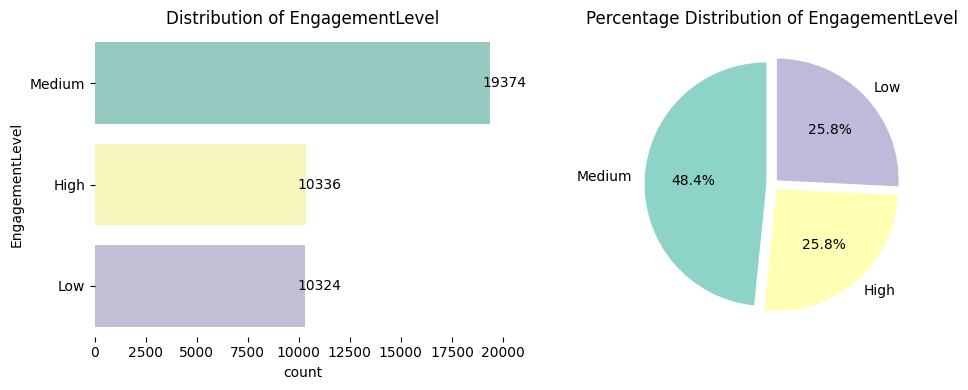

/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/2679668328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set3')


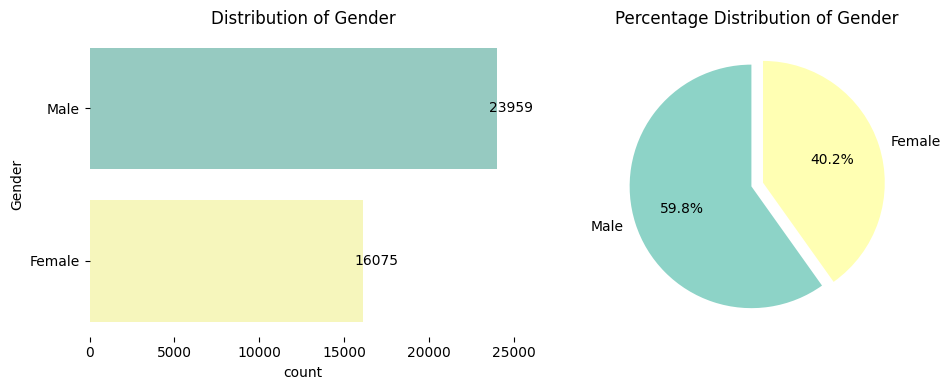

/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/2679668328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set3')


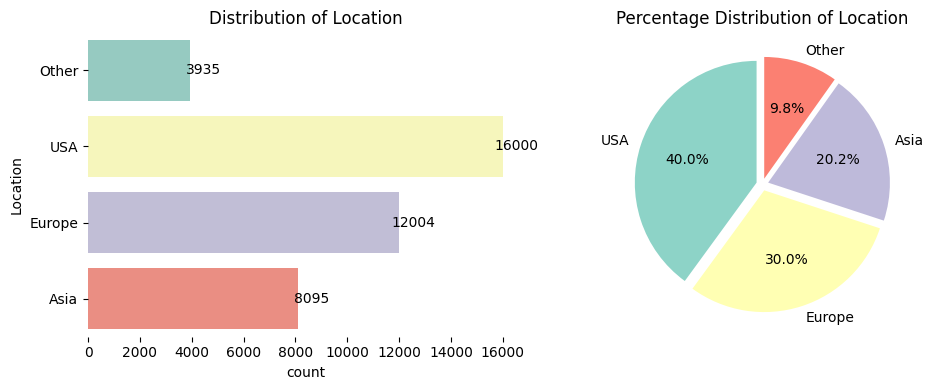

/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/2679668328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set3')


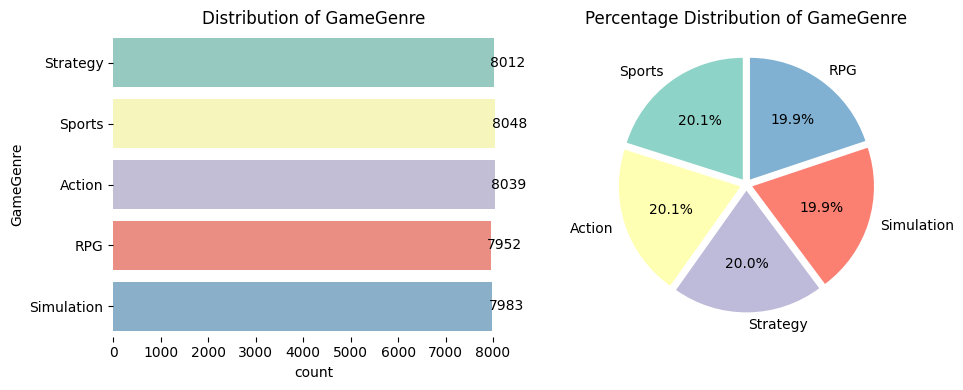

/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/2679668328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=data, palette='Set3')


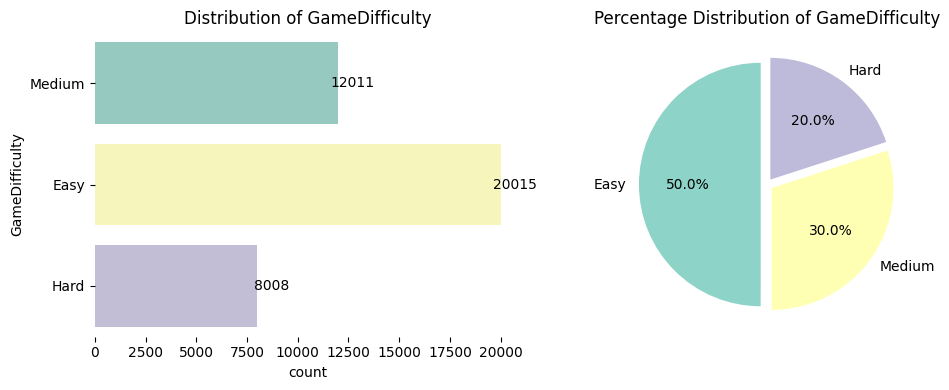

In [10]:
def plot_categorical_distribution(column_name, data):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=data, palette='Set3')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    data[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), 
                                              startangle=90, explode=[0.05]*data[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

categorical_features = ['EngagementLevel', 'Gender', 'Location', 'GameGenre', 'GameDifficulty']

for feature in categorical_features:
    plot_categorical_distribution(feature, data)


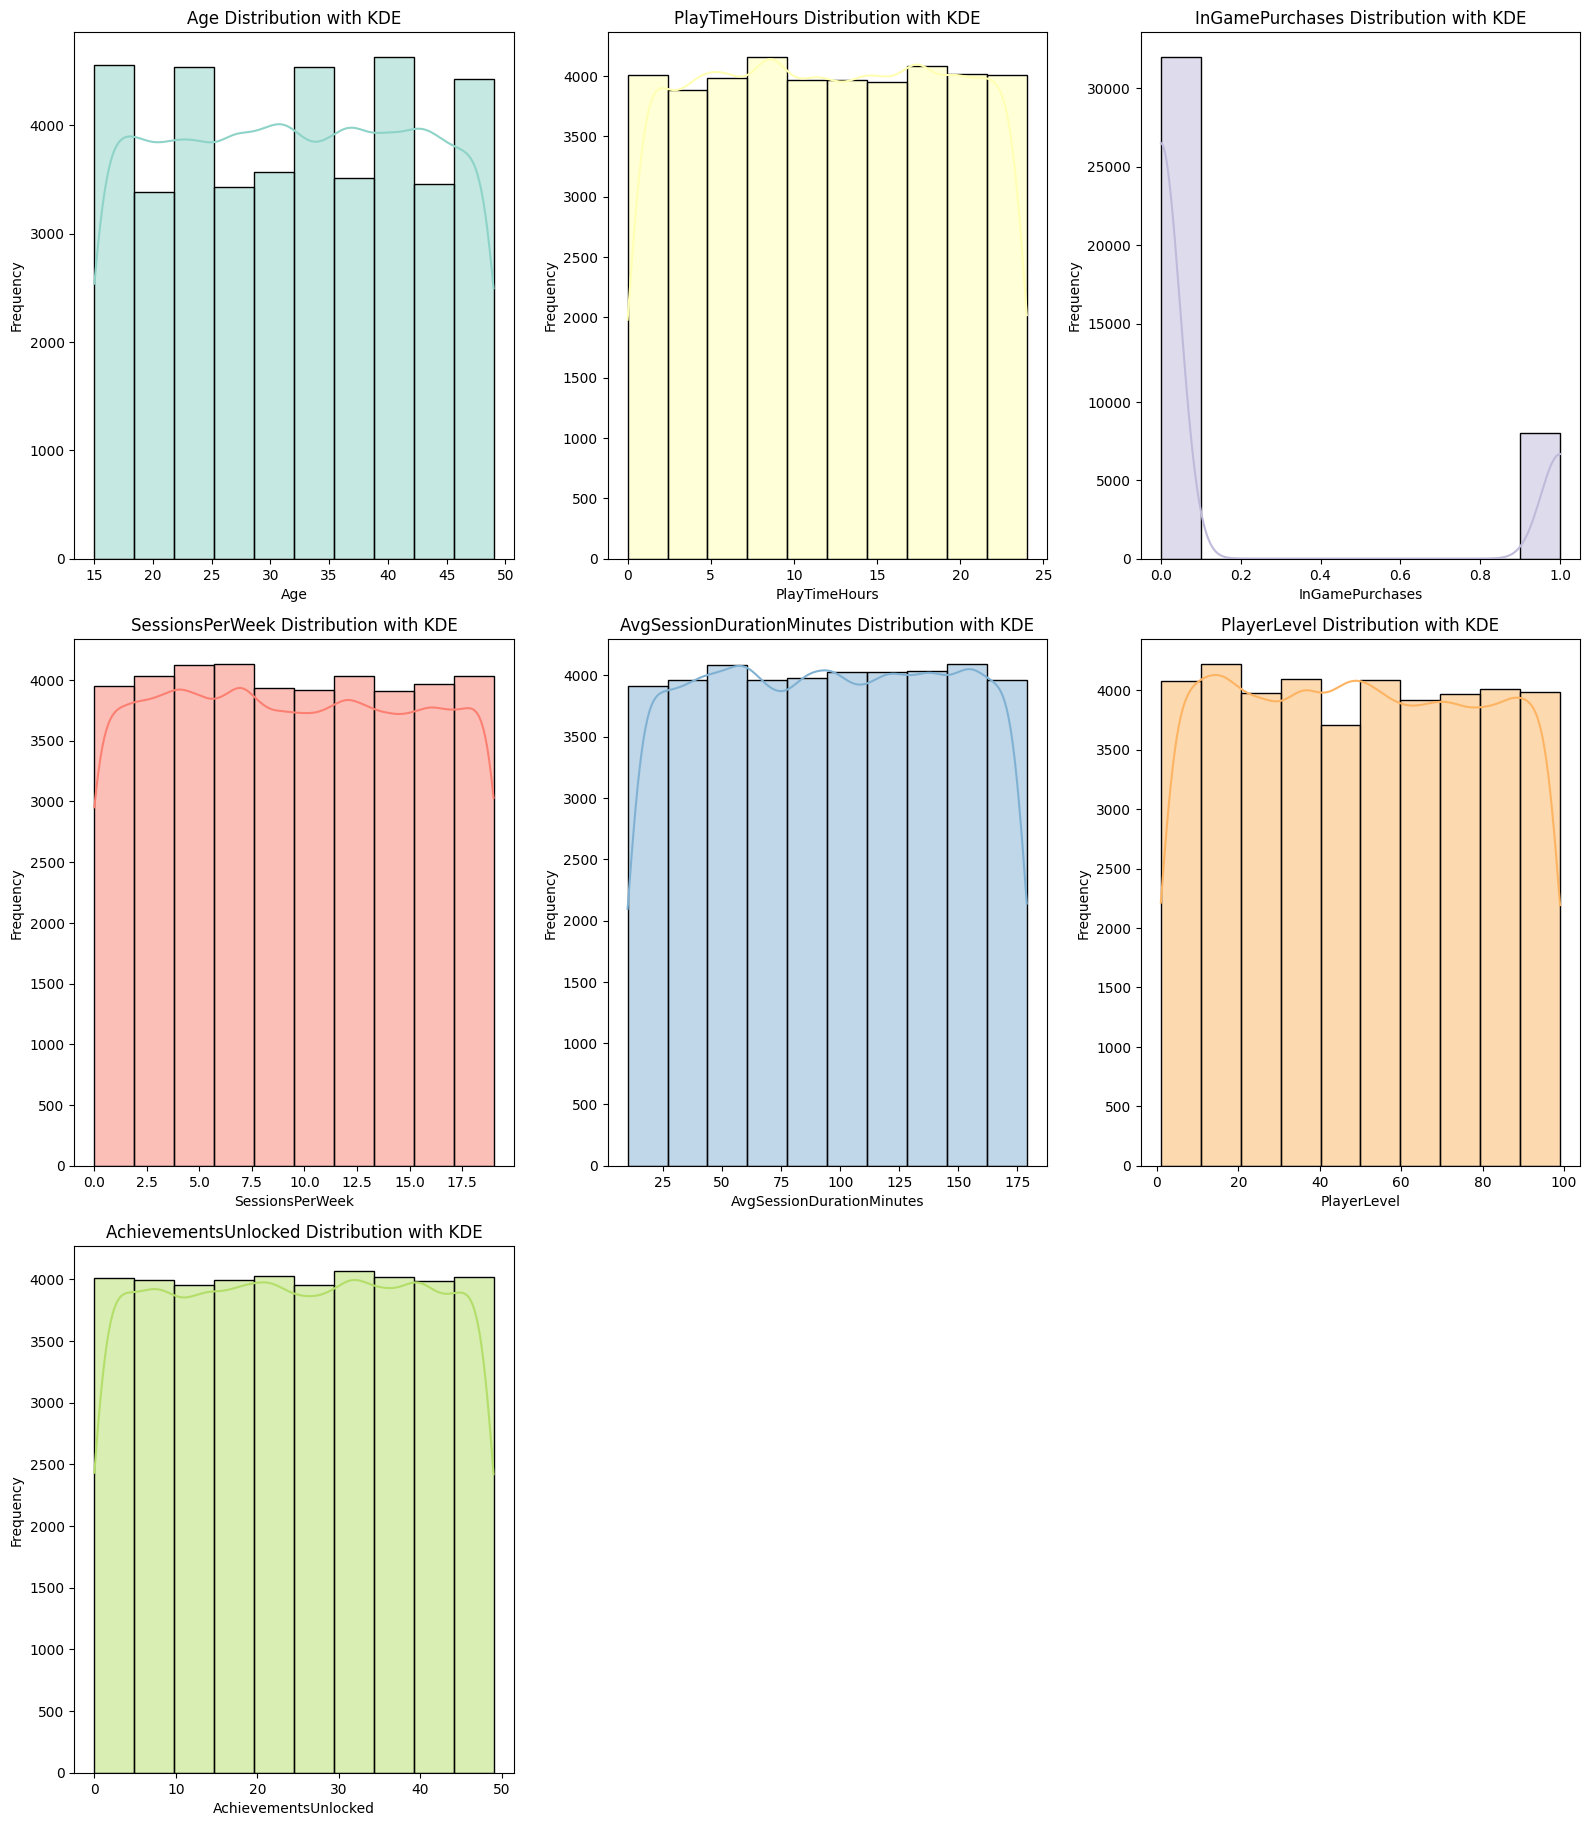

In [7]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, columns):
    plt.figure(figsize=(16, 24))  # Adjusted to accommodate more plots
    
    set3_colors = sns.color_palette("Set3", len(columns))
    
    for i, column in enumerate(columns):
        plt.subplot(4, 3, i + 1)  
        sns.histplot(data[column], kde=True, bins=10, color=set3_colors[i])
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Columns to analyze
columns_to_analyze = [
    'Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
    'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'
]

# Perform univariate analysis
univariate_analysis(data, columns_to_analyze)


In [8]:
#skewness and kurtosis
# Select only numerical columns
numerical_df = data.select_dtypes(include=[np.number])

# Calculate skewness and kurtosis
skewness = numerical_df.skew()
kurtosis = numerical_df.kurt()

display("Skewness:", skewness)
print("\n")
display("Kurtosis:", kurtosis)

'Skewness:'

PlayerID                     0.000000
Age                         -0.004466
PlayTimeHours               -0.002225
InGamePurchases              1.493398
SessionsPerWeek              0.015517
AvgSessionDurationMinutes   -0.005632
PlayerLevel                  0.018754
AchievementsUnlocked        -0.005136
dtype: float64

'Kurtosis:'

PlayerID                    -1.200000
Age                         -1.192417
PlayTimeHours               -1.195706
InGamePurchases              0.230249
SessionsPerWeek             -1.206566
AvgSessionDurationMinutes   -1.199556
PlayerLevel                 -1.199738
AchievementsUnlocked        -1.199623
dtype: float64


Summary Statistics for Age by Engagement Level:
                      mean  median  count
EngagementLevel                          
High             31.920085    32.0  10336
Low              31.896939    32.0  10324
Medium           32.082120    32.0  19374


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')


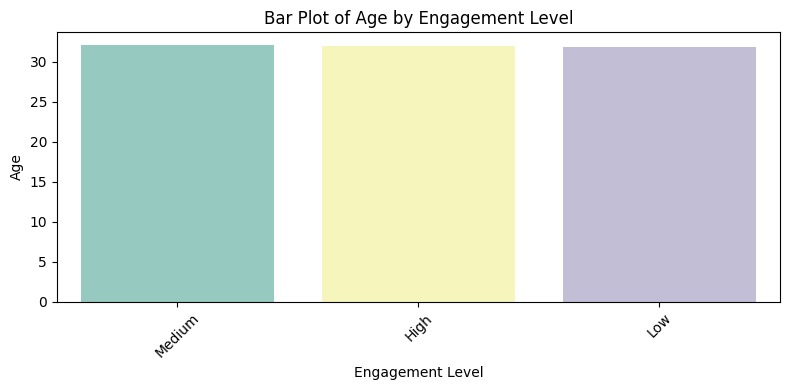


Summary Statistics for PlayTimeHours by Engagement Level:
                      mean     median  count
EngagementLevel                             
High             12.069238  11.981024  10336
Low              12.104915  12.074409  10324
Medium           11.957503  11.992280  19374


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')


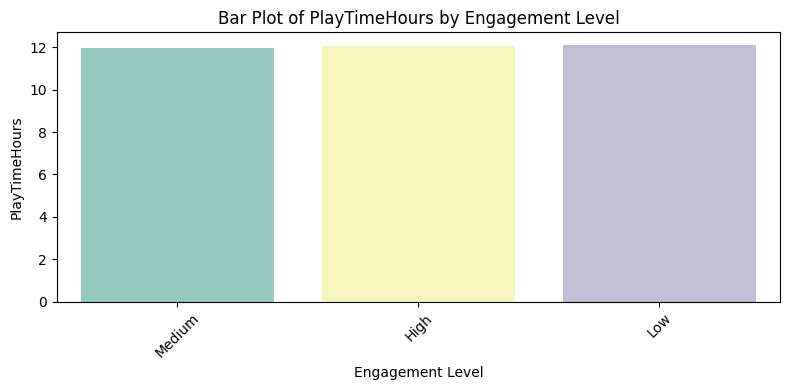


Summary Statistics for InGamePurchases by Engagement Level:
                     mean  median  count
EngagementLevel                         
High             0.206463     0.0  10336
Low              0.197307     0.0  10324
Medium           0.199752     0.0  19374


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')


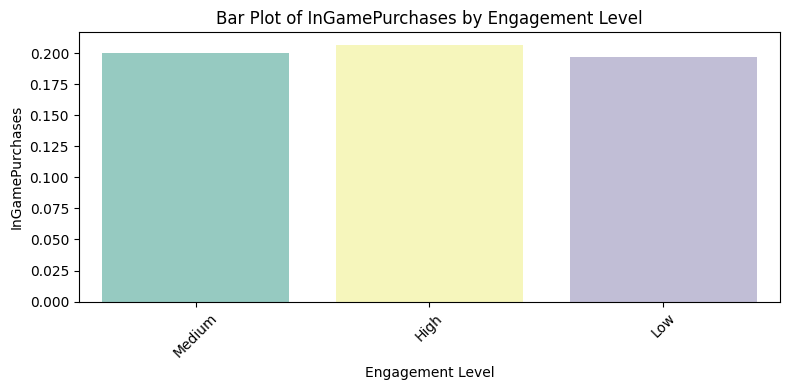


Summary Statistics for SessionsPerWeek by Engagement Level:
                      mean  median  count
EngagementLevel                          
High             14.254547    15.0  10336
Low               4.530511     3.0  10324
Medium            9.553267     9.0  19374


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')


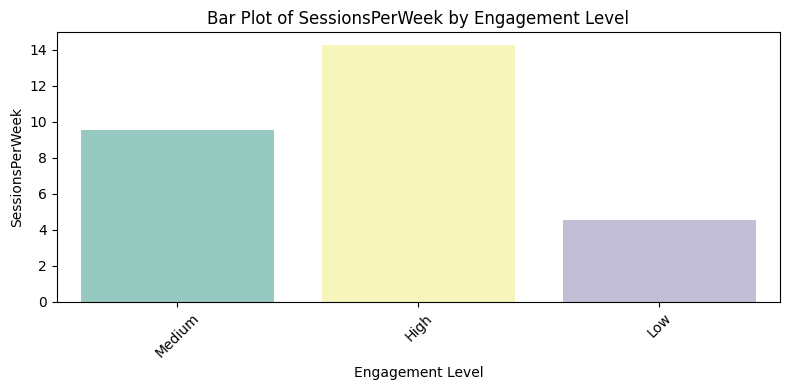


Summary Statistics for AvgSessionDurationMinutes by Engagement Level:
                       mean  median  count
EngagementLevel                           
High             131.921827   137.0  10336
Low               66.882119    53.0  10324
Medium            89.856405    84.0  19374


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')


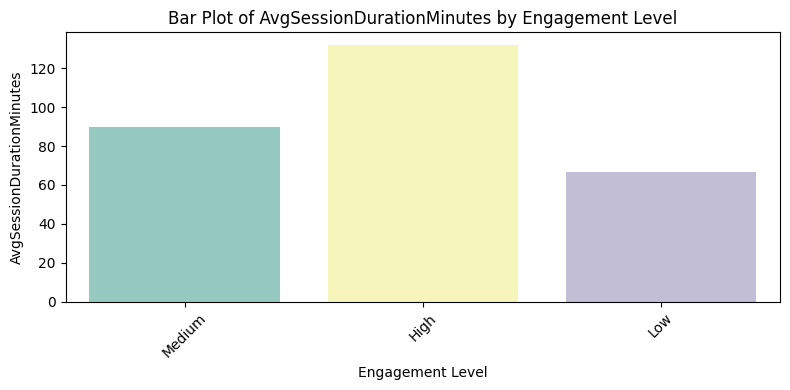


Summary Statistics for PlayerLevel by Engagement Level:
                      mean  median  count
EngagementLevel                          
High             50.823723    51.0  10336
Low              46.101414    44.0  10324
Medium           50.926293    51.0  19374


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')


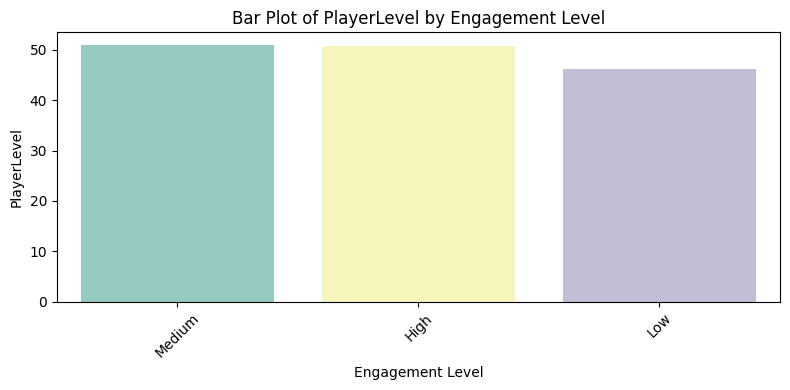


Summary Statistics for AchievementsUnlocked by Engagement Level:
                      mean  median  count
EngagementLevel                          
High             25.095975    25.0  10336
Low              22.661565    22.0  10324
Medium           25.216424    26.0  19374


/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')
/var/folders/67/30n6r04x5tv_vpf5gf2t8t_80000gn/T/ipykernel_9440/3031554247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')


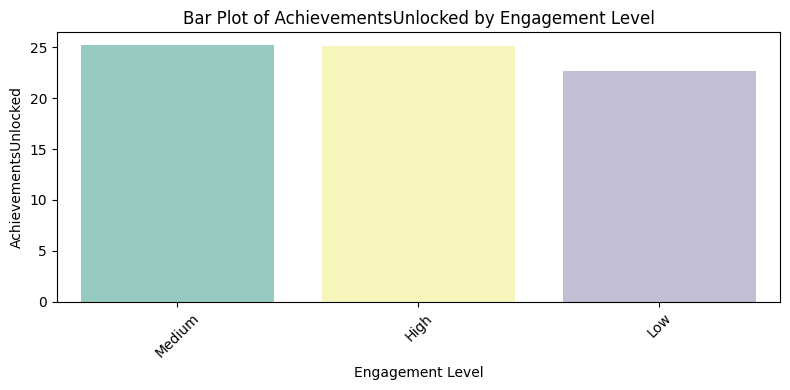

In [16]:
# Define the columns to analyze
columns_to_analyze = [
    'Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 
    'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'
]

# Loop through each feature to display summary statistics and bar plot
for column in columns_to_analyze:
    # Calculate summary statistics grouped by EngagementLevel
    stats = data.groupby('EngagementLevel')[column].agg(['mean', 'median', 'count'])
    
    # Display summary statistics
    print(f"\nSummary Statistics for {column} by Engagement Level:")
    print(stats)
    
    # Plot bar plot
    plt.figure(figsize=(8, 4))
    sns.barplot(data=data, x='EngagementLevel', y=column, ci=None, palette='Set3')
    plt.title(f'Bar Plot of {column.replace("_", " ")} by Engagement Level')
    plt.xlabel('Engagement Level')
    plt.ylabel(column.replace('_', ' '))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

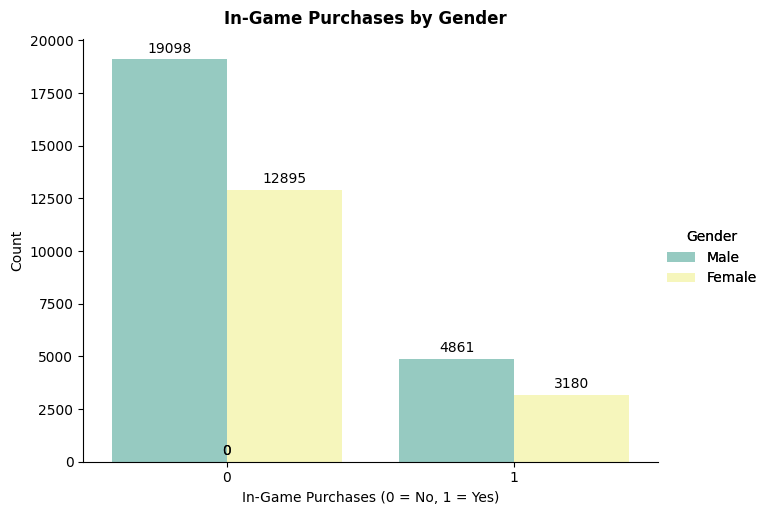

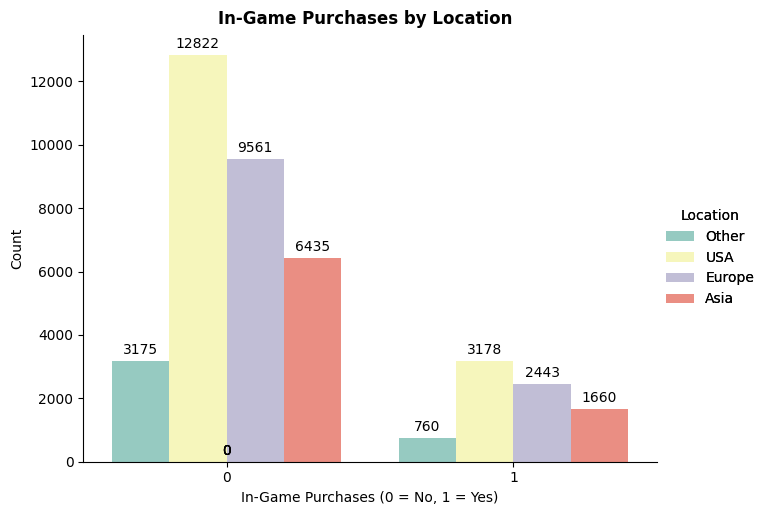

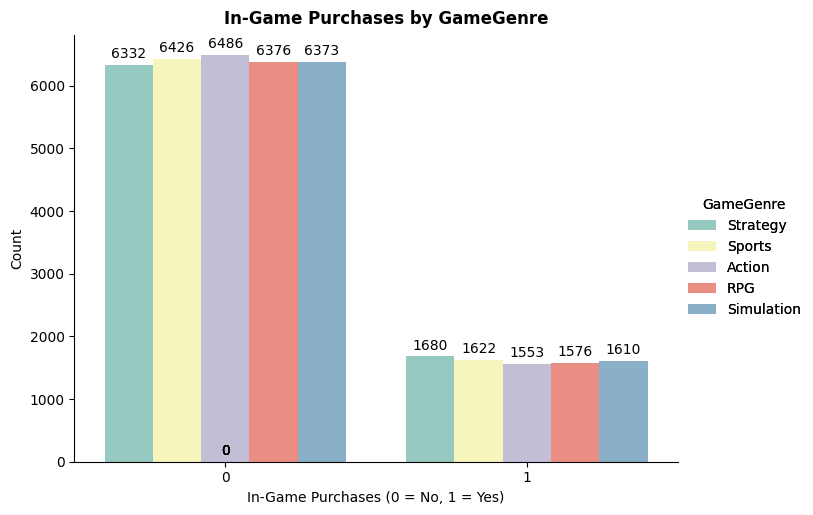

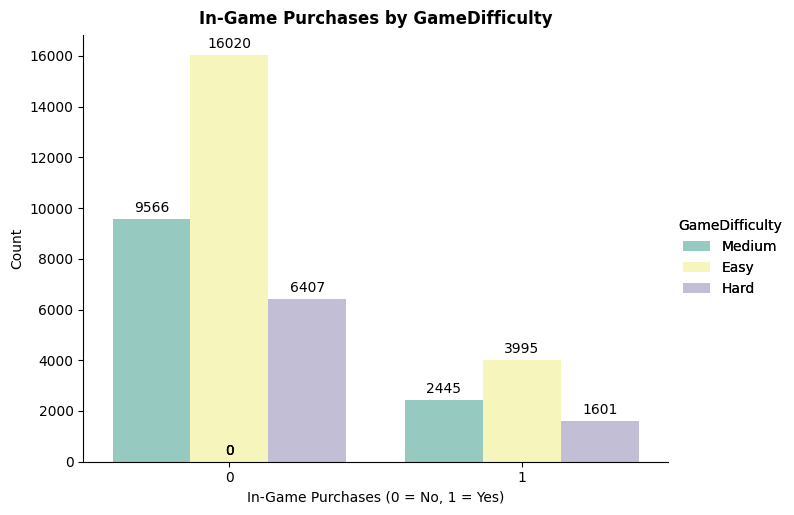

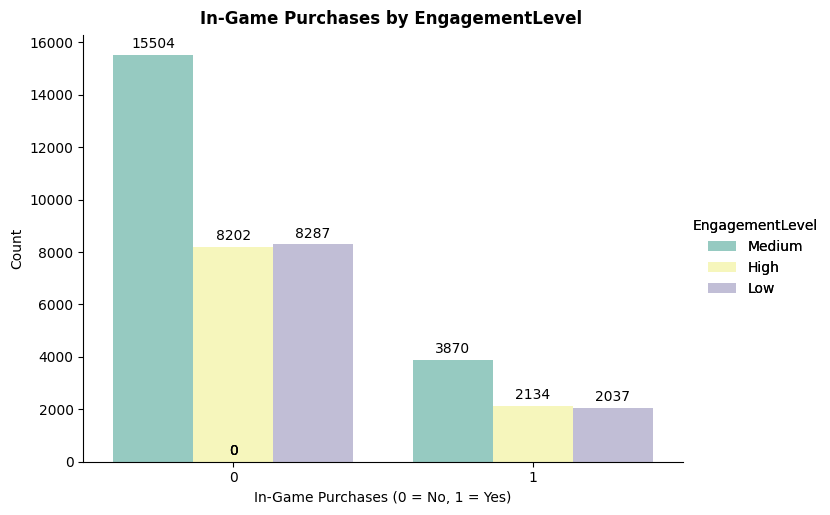

In [19]:
# Define the categorical columns to analyze against 'InGamePurchases'
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

# Loop through each categorical column to create catplots
for column in categorical_columns:
    # Create the catplot for InGamePurchases vs the current categorical column
    g = sns.catplot(
        data=data,
        x='InGamePurchases', 
        hue=column, 
        kind='count',
        height=5, 
        aspect=1.2,
        palette='Set3'
    )

    # Customize labels and titles
    g.set_axis_labels("In-Game Purchases (0 = No, 1 = Yes)", "Count")
    g.figure.suptitle(f'In-Game Purchases by {column}', weight='bold', y=1.02)

    # Add text annotations
    for ax in g.axes.flat:
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', 
                        va='baseline', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

    # Add the legend
    g.add_legend(title=column)

    plt.show()


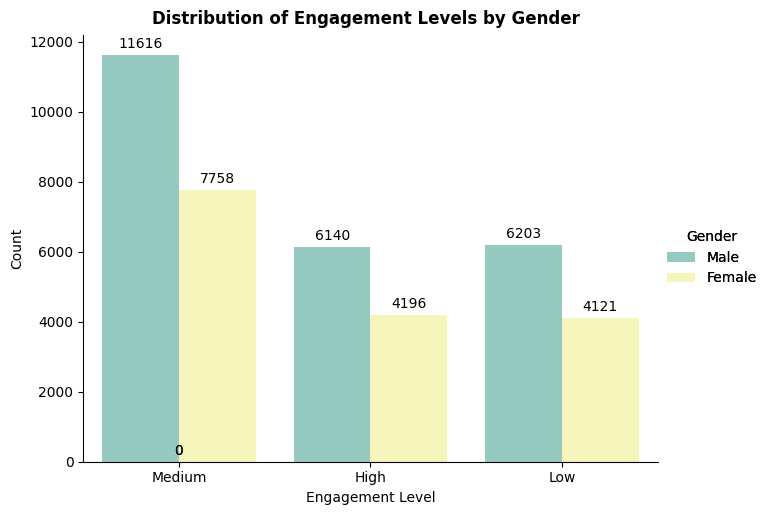

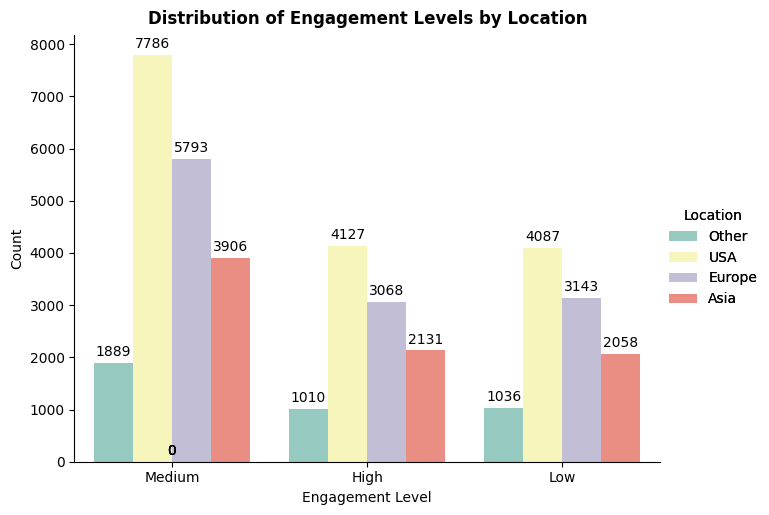

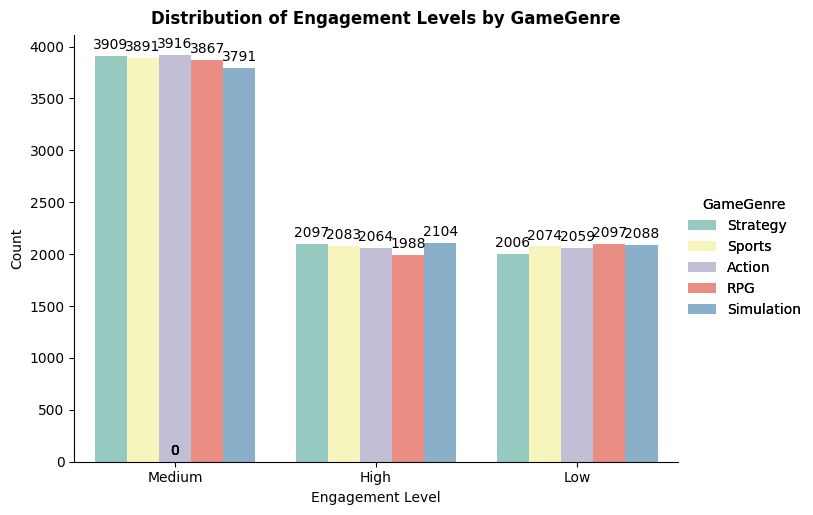

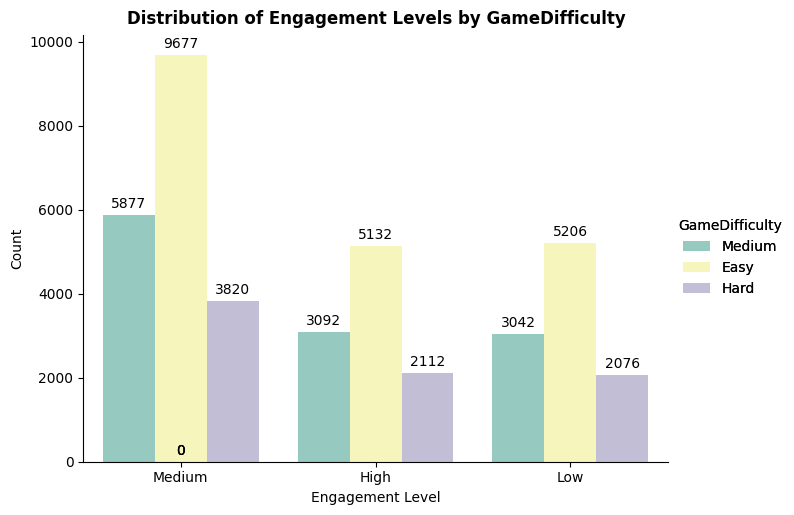

In [22]:
# Define the categorical columns to analyze against 'EngagementLevel'
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']

for column in categorical_columns:
    # Create the catplot for EngagementLevel vs the current categorical column
    g = sns.catplot(
        data=data,
        x='EngagementLevel', 
        hue=column, 
        kind='count',
        height=5, 
        aspect=1.2,
        palette='Set3'
    )

    # Customize axis labels and title
    g.set_axis_labels("Engagement Level", "Count")
    g.figure.suptitle(f'Distribution of Engagement Levels by {column}', weight='bold', y=1.02)

    # Add text annotations on bars
    for ax in g.axes.flat:
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', 
                        va='baseline', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

    # Add the legend
    g.add_legend(title=column)

    # Show the plot
    plt.show()


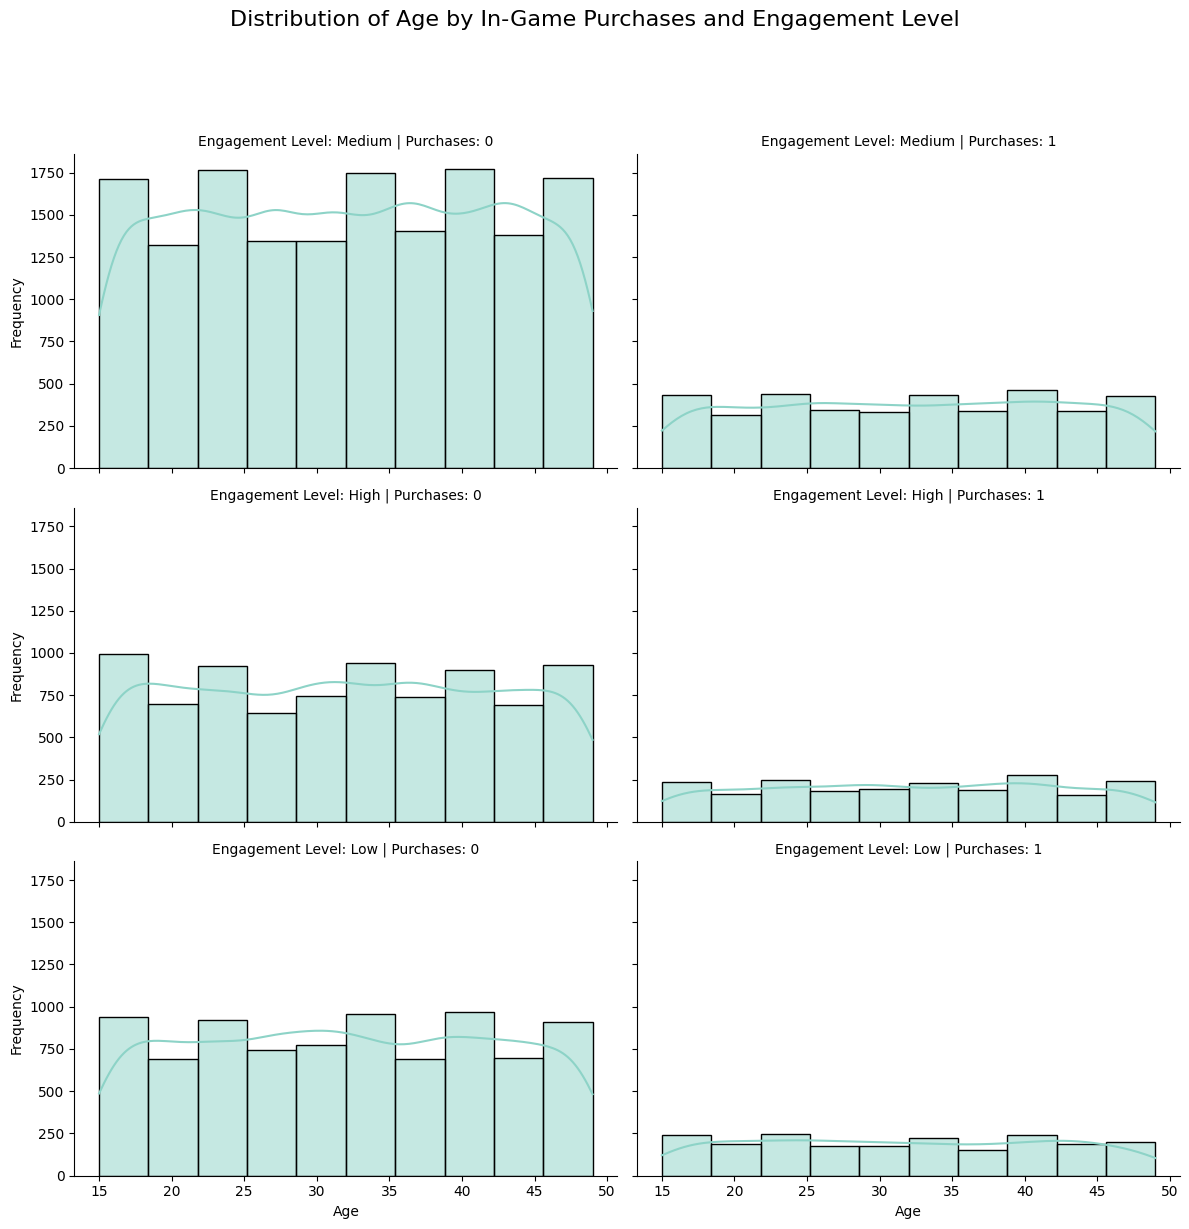

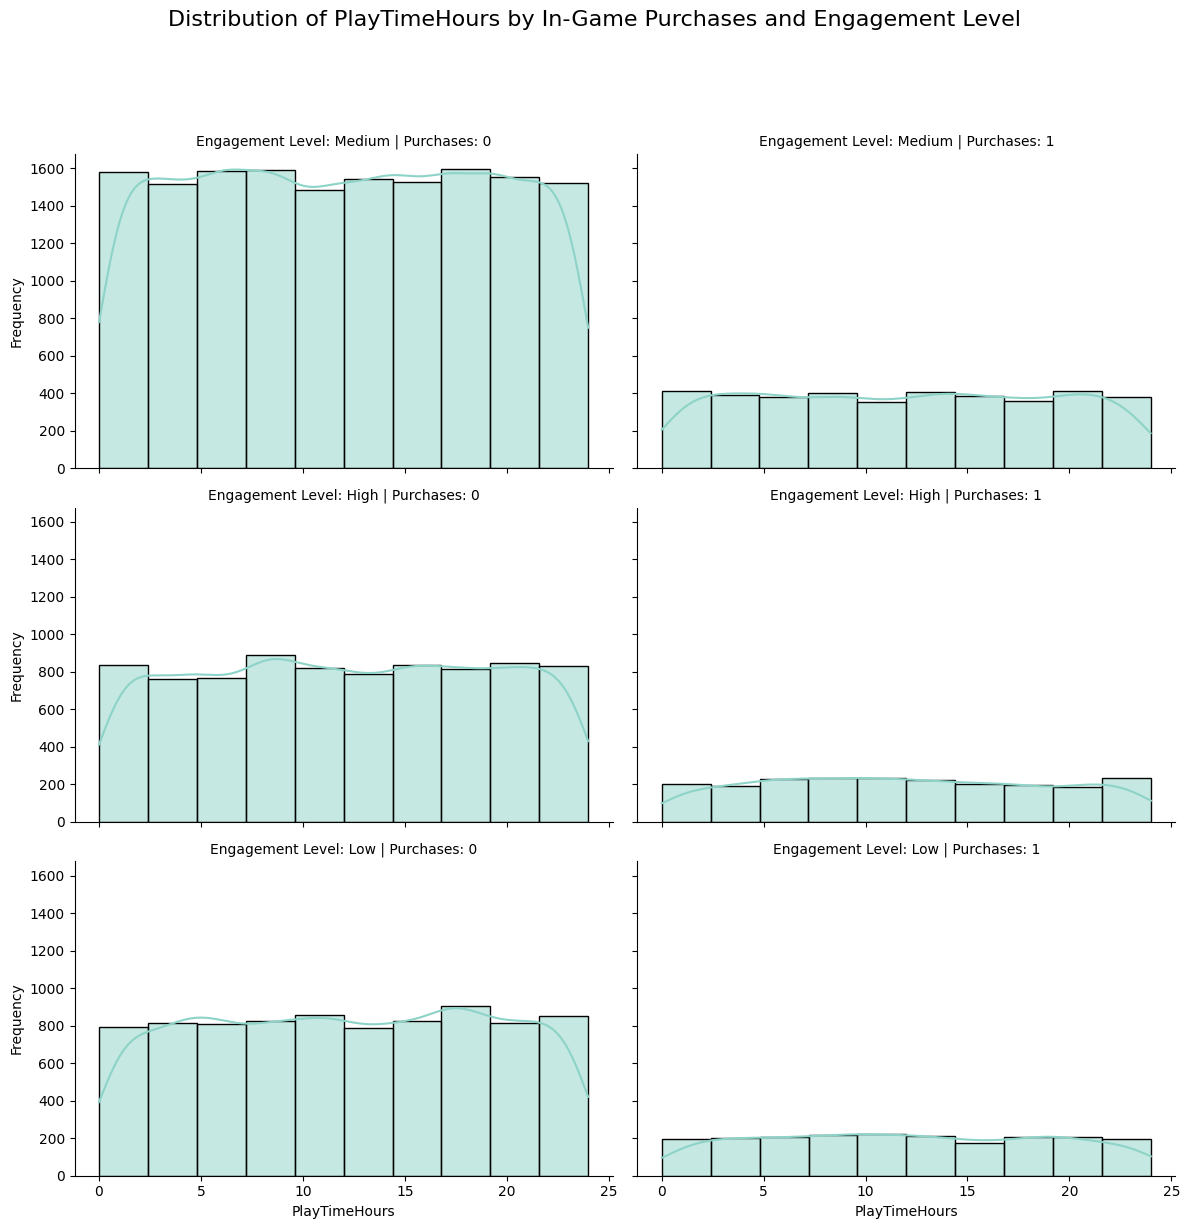

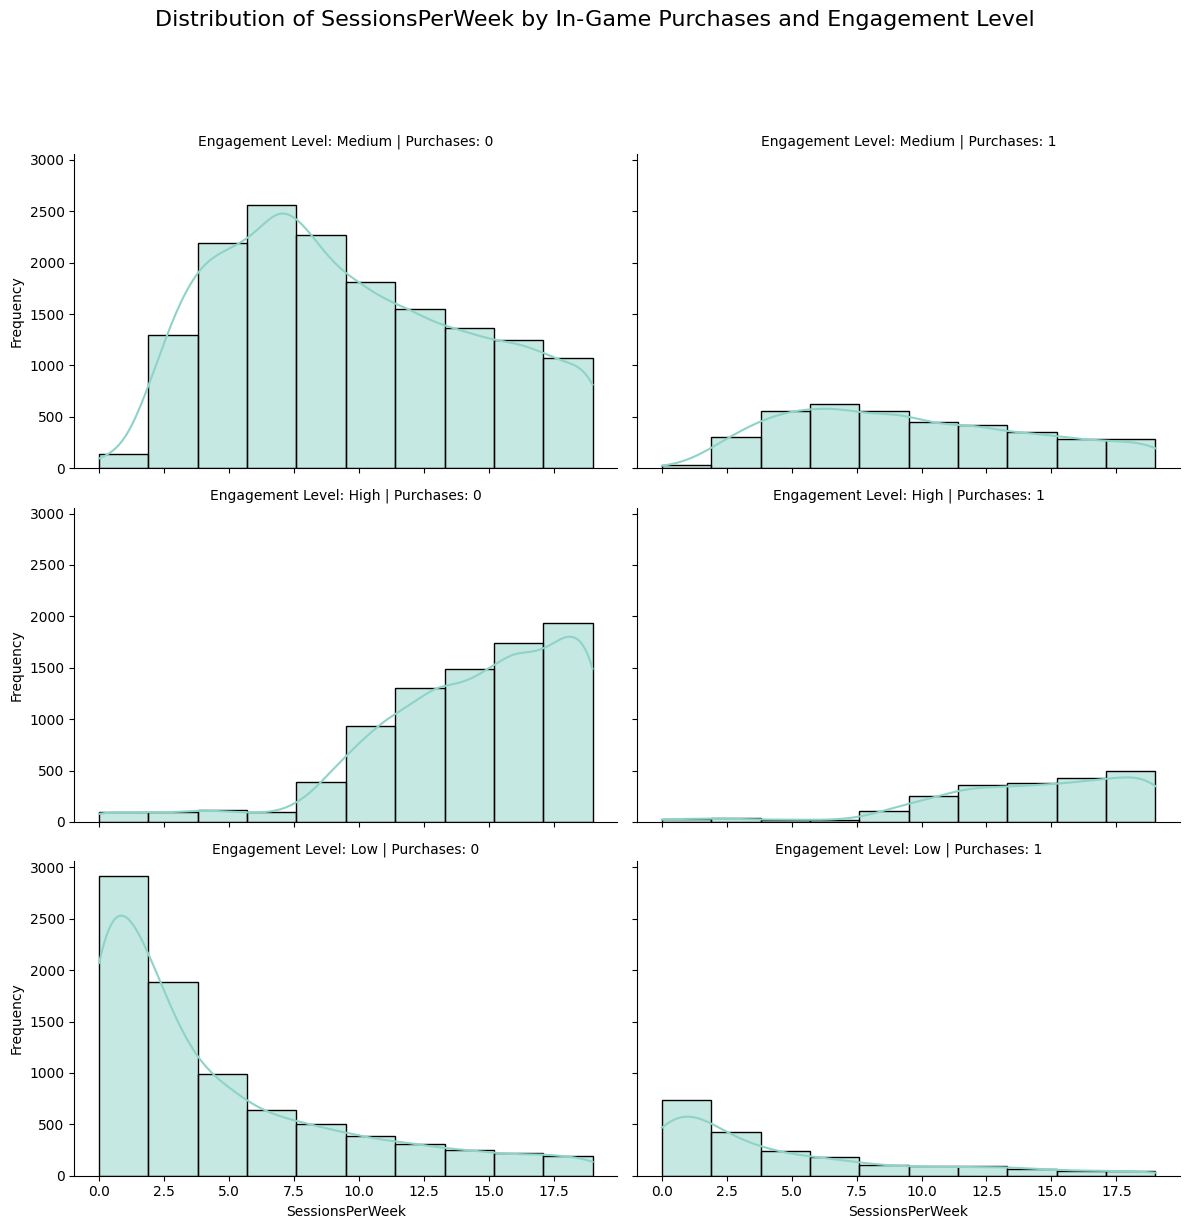

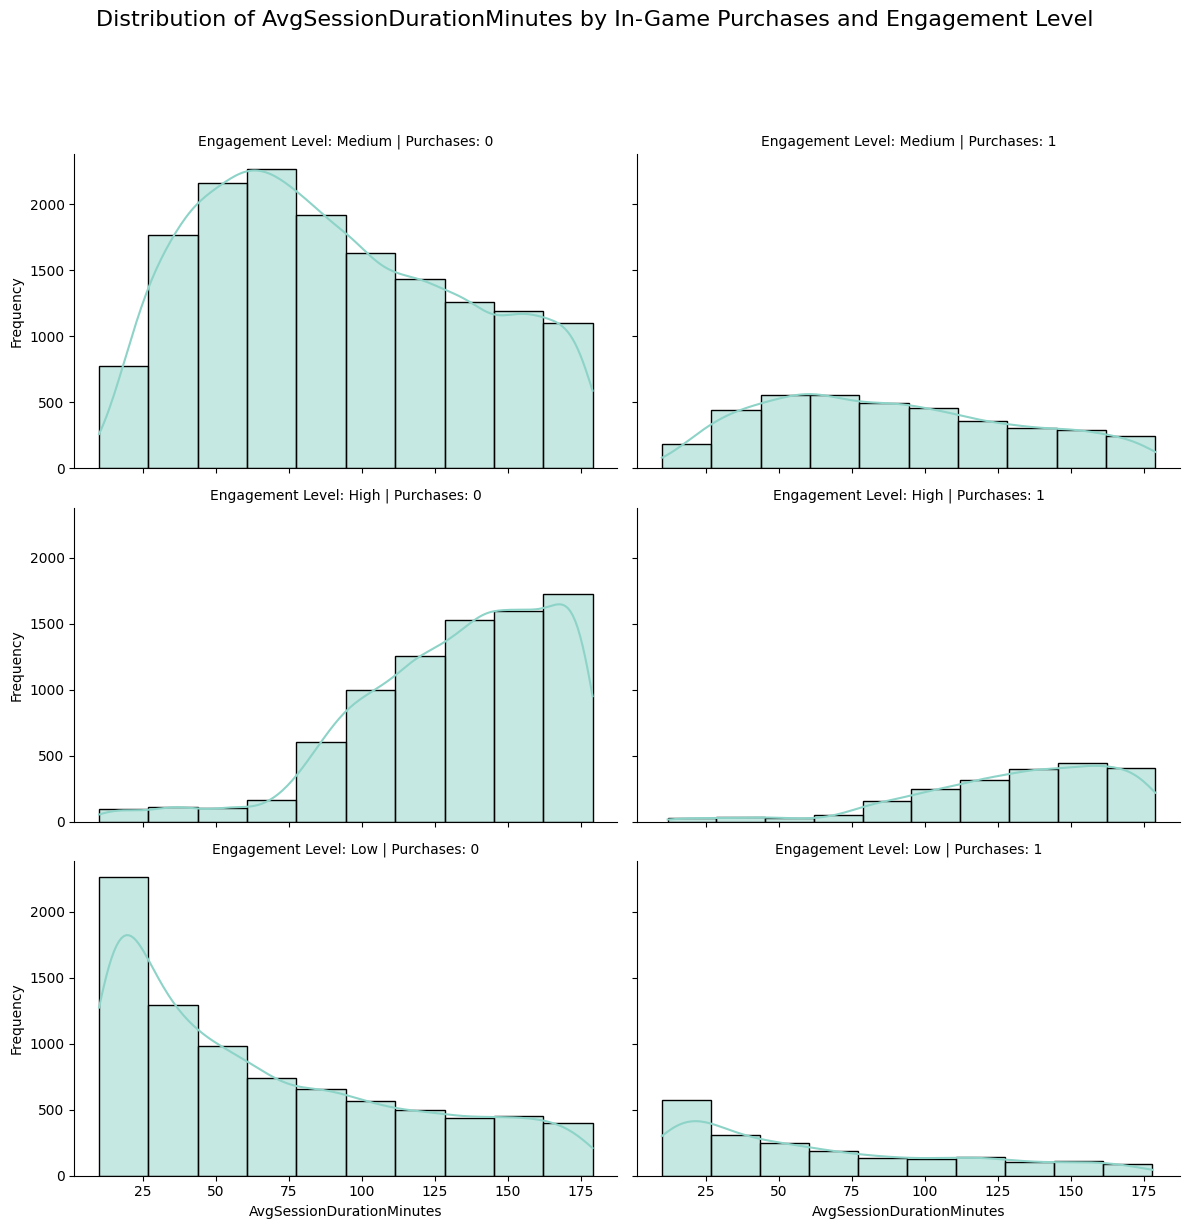

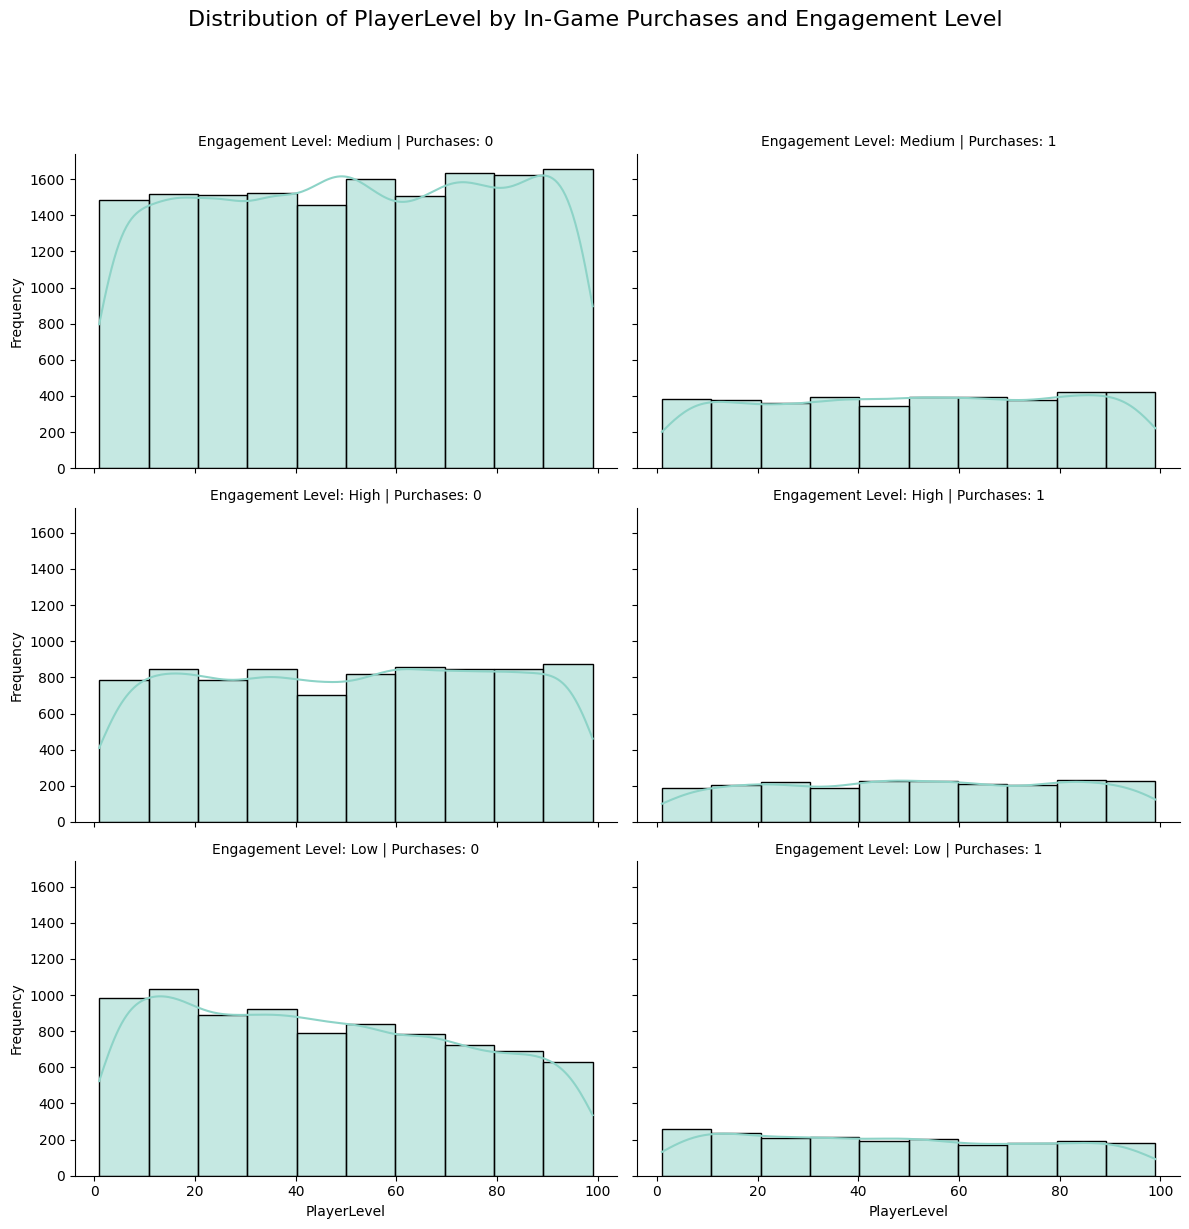

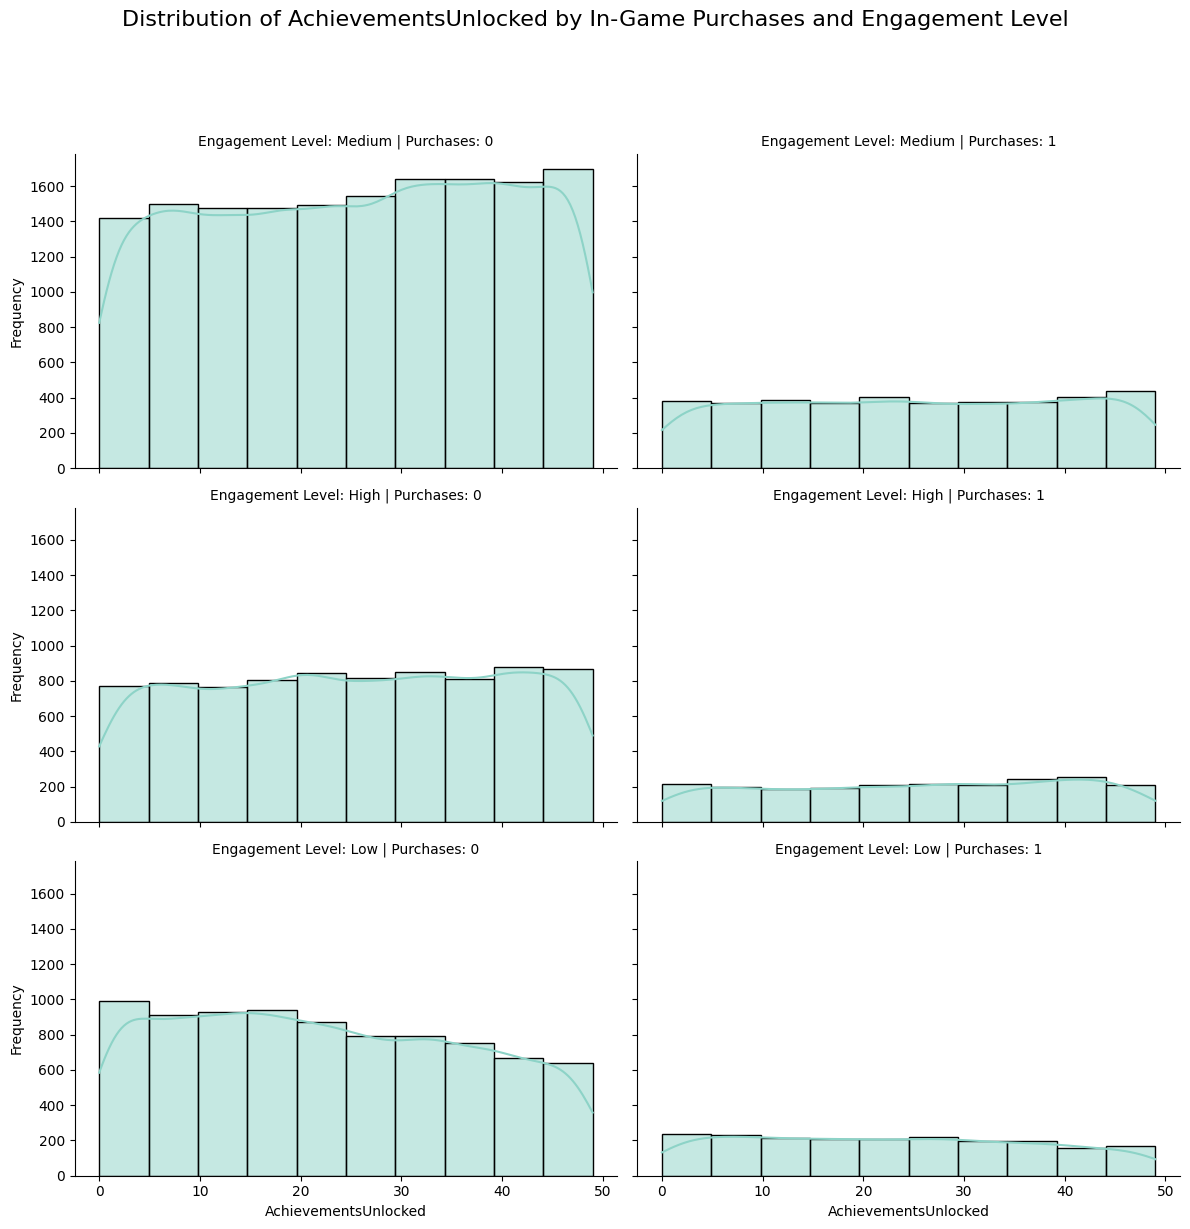

In [23]:
# Define the numerical features to plot against InGamePurchases by EngagementLevel
numerical_features = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 
                      'AvgSessionDurationMinutes', 'PlayerLevel', 
                      'AchievementsUnlocked']

# Loop through each numerical feature to create FacetGrid plots by EngagementLevel and InGamePurchases
for feature in numerical_features:
    g = sns.FacetGrid(
        data, 
        row='EngagementLevel', 
        col='InGamePurchases', 
        height=4, 
        aspect=1.5, 
        sharex=True, 
        sharey=True
    )
    
    # Map the histogram with KDE for each feature
    g.map(sns.histplot, feature, kde=True, bins=10, color=sns.color_palette("Set3")[0])
    
    # Set axis labels and titles
    g.set_axis_labels(feature.replace('_', ' '), 'Frequency')
    g.set_titles("Engagement Level: {row_name} | Purchases: {col_name}")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(
        f'Distribution of {feature.replace("_", " ")} by In-Game Purchases and Engagement Level', 
        fontsize=16, 
        y=1.02
    )
    
    plt.show()

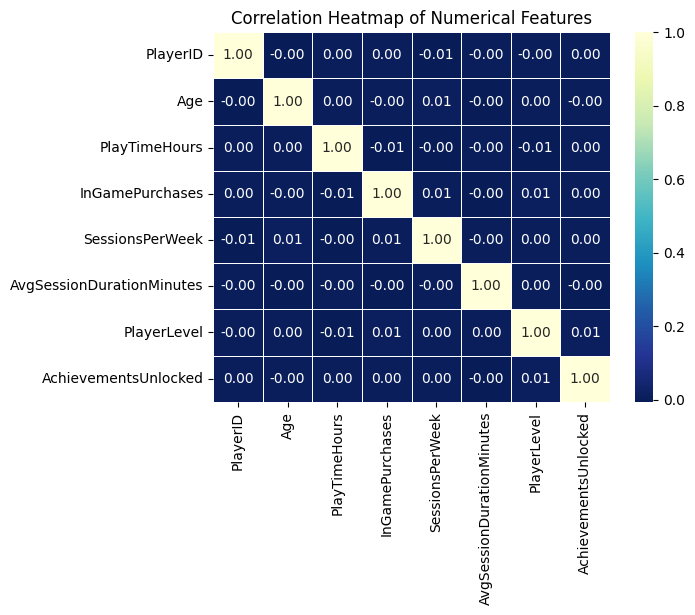

In [27]:
# Correlation heatmap
numerical_columns = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu_r", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [26]:
#processed data 
encoded_data=pd.read_csv('~/Library/CloudStorage/OneDrive-国立大学法人東海国立大学機構/Weekly_challenges/Data science and Analytics/Predict online behavior kaggle/Data/processed/processed_online_gaming_behavior_dataset.csv')
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations with EngagementLevel
correlations_with_EngagementLevel = encoded_data.corr()['EngagementLevel'].sort_values(ascending=False)

# Convert to DataFrame
correlation_table = correlations_with_EngagementLevel.to_frame(name='Correlation with EngagementLevel').reset_index()

# Rename columns for clarity
correlation_table.rename(columns={'index': 'Feature'}, inplace=True)

# Display the correlation table
display(correlation_table)

,Feature,Correlation with EngagementLevel
0,EngagementLevel,1.000000
1,SessionsPerWeek,0.605996
2,AvgSessionDurationMinutes,0.476698
3,AchievementsUnlocked,0.060576
4,PlayerLevel,0.059315
5,InGamePurchases,0.008209
6,Genre_Strategy,0.007700
7,GameDifficulty,0.005057
8,Gender,0.004978
9,Location_USA,0.002499


# Preleminary data exploration
- Data set size: 40034 rows and 13 columns: fairly large, providing robust base for statistical and machine learning analysis
- 8 numerical features and 5 categorical features: Gender, Location, GameGenre, GameDifficulty, and EngagementLevel, need encoding for use in predictive modeling.
- Target variable (engagement level) is categorized as High, Medium, Low
- No null values and no duplicates
- Numerical features:
* Age: 
1. Mean 32 years
2. Majority of players between 23 and 41 (interquartile)
3. min age: 15 and max age: 49
4. insight: players seem to be young to middle aged
* playTimeHours:
1. Mean 12 hours/session
2. Most players play between 6 and 18 hours
3. min: near zero and max: 24 hours
4. insight: players exhibit a wide range of play duration which could reflect casual vs hardcore gaming behaviors
* SessionPerWeek:
1. Mean: ~9 sessions per week
2. Players typically engage in 4–14 sessions weekly (Interquartile range)
3. Min: 0 and Max: 19 sessions; suggests heavy engagement for certain players.
4. Insights: The frequency of sessions per week is a key engagement indicator.
* AvgSessionDurationMinutes:
1. Mean: ~95 minutes per session.
2. Most sessions last 52–137 minutes.
3. Min: 10 and Max: 179 minutes per session.
4. Insights: Longer sessions may correlate with higher engagement and potential purchases.
* InGamePurchases:
1. Mean: ~20% of players make in-game purchases (1), while the rest do not (0).
2. Insights:A minority of players contribute to in-game monetization, likely forming a critical revenue segment.
* PlayerLevel:
1. Mean level: 50, with most players between level 25 and 74.
2. Min 1 and Max: Level 99.
3. Insights: Higher-level players could indicate seasoned gamers, likely influencing retention and engagement.
* AchievementsUnlocked:
1. Mean: 25 achievements unlocked.
2. Most players unlocked 12–37 achievements.
3. min 0 and max 49
4. Insights: Higher achievements unlocked may indicate stronger engagement or expertise.

# unique values analysis
PlayerID: 40,034 unique values (each player has a unique ID).
Age: 35 unique values, ranging from 15 to 49 years.
Gender: 2 unique values (Male, Female).
Location: 4 unique values (Other, USA, Europe, Asia).
GameGenre: 5 unique values (Strategy, Sports, Action, RPG, Simulation).
PlayTimeHours: 40,034 unique values (likely continuous data).
InGamePurchases: 2 unique values (binary: 0, 1).
GameDifficulty: 3 unique values (Medium, Easy, Hard).
SessionsPerWeek: 20 unique values, ranging from 0 to 19 sessions.
AvgSessionDurationMinutes: 170 unique values, representing session durations in minutes.
PlayerLevel: 99 unique values, ranging from 1 to 99.
AchievementsUnlocked: 50 unique values, ranging from 0 to 49.
EngagementLevel: 3 unique values (High, Medium, Low).
- Numerical Columns:
PlayerID, Age, PlayTimeHours, InGamePurchases, SessionsPerWeek, AvgSessionDurationMinutes, PlayerLevel, AchievementsUnlocked.
- Categorical Columns:
Gender, Location, GameGenre, GameDifficulty, EngagementLevel.

# Observational Insights from Skewness and Kurtosis
- Most numerical features are symmetric (skewness near 0), indicating balanced distributions.
- InGamePurchases is positively skewed and slightly heavy-tailed, suggesting most players don't purchase, but a few outliers contribute significantly.

# categorical distribution
- 60% of players are male 
- most players are from the USA followed by Europe
- Genres are evenly distributed
- 50% players play on easy mode

# Correlation with engagement level
- Strong positive correlation with Session per week (0.606) amd moderate correlation with AvgSessionDurationMinutes (0.477)
